In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy as sc
from scipy import random, linalg, stats, special

In [2]:
# function that generates positive symmetric definite matrices
def PosSymDefMatrix(n,sd):
    M = np.matrix(np.random.rand(n,n))
    M = 0.5*(M + M.T)
    M = M + sd*np.eye(n)
    return M

In [3]:
#parameters
NProperties = 4
NClasses = 6
NObjects = 150 # apparantly this is some limit for the gamma function so either take the logarithm of the input of the gamma function or the data points should be less than 170
symmetric_dirichlet = 1
distanceBTWclasses = 10

## Generating data with known parameters
# parameters of the mean and the covariance of the 6 NFeature dimensional gaussian

# The mean matrix
Mu = [(np.random.random(NProperties)*distanceBTWclasses*i) for i in range(1,NClasses+1)]

# generating symmetric positive semi-definite matrix for the covariances
sdDiff = 4
SDClass = np.random.rand(1,NClasses)+sdDiff

#Cov = [np.absolute(np.triu((np.dot(np.random.randn(NProperties,NProperties)*i,(np.random.randn(NProperties,NProperties)*i).transpose())))) for i in SDClass[0]]
#Cov = [np.maximum(cov, cov.transpose()) for cov in Cov]
Cov = [PosSymDefMatrix(NProperties,i) for i in SDClass[0]]

print('the means of the properties for the classes')
for i in range(0,NClasses):
    print(['The means for Class ' + str(i+1)], Mu[i])
print('\n')
for i in range(0,NClasses):
    print(['the variance for Class ' + str(i+1)])
    print(Cov[i])

the means of the properties for the classes
['The means for Class 1'] [3.36378725 9.1203701  4.40763098 3.70496565]
['The means for Class 2'] [ 0.86379716 18.48379295 15.04415345 13.88764705]
['The means for Class 3'] [23.69570559 24.9239438   9.09985837 16.39245047]
['The means for Class 4'] [35.04745592 39.6302134  38.8585804   9.54991933]
['The means for Class 5'] [39.27040856 21.77737625 34.6313811  24.18225315]
['The means for Class 6'] [ 4.47726438 53.33387106 55.63396592 58.48921348]


['the variance for Class 1']
[[4.86630904 0.18029308 0.8327376  0.56440336]
 [0.18029308 5.35969546 0.36218067 0.36963315]
 [0.8327376  0.36218067 5.26317933 0.30736828]
 [0.56440336 0.36963315 0.30736828 4.82432263]]
['the variance for Class 2']
[[4.88844942 0.6547539  0.76729105 0.256783  ]
 [0.6547539  4.41693795 0.54253963 0.63886957]
 [0.76729105 0.54253963 4.42614981 0.48223975]
 [0.256783   0.63886957 0.48223975 4.86060947]]
['the variance for Class 3']
[[4.79980369 0.64895488 0.50157106 0.

In [4]:
# (1)
# we can have symmetric dirichlet that put a same amount of probability to each classes appearance probability
symmetric_dirichlet = 1

if symmetric_dirichlet==1:
    theta = np.repeat(1.0/NClasses,NClasses)
else:
    a = np.ones(NClasses)
    n = 1
    p = len(a)
    rd = np.random.gamma(np.repeat(a,n),n,p)
    rd = np.divide(rd,np.repeat(np.sum(rd),p))
    theta = rd

print('The probabilities of each classes from 1 to '+str(NClasses))
print(theta)

The probabilities of each classes from 1 to 6
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [5]:
# (2)
# generate the class from a multinomial distribution with parameter theta
r = np.random.multinomial(NObjects,theta)

print('The number of objects in each classes from 1 to '+str(NClasses))
print(r)

The number of objects in each classes from 1 to 6
[34 21 20 28 22 25]


In [6]:
# (3)
rAlln = [np.random.multivariate_normal(Mu[i], Cov[i], r[i]) for i in range(0,NClasses)]

/home/zzh/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


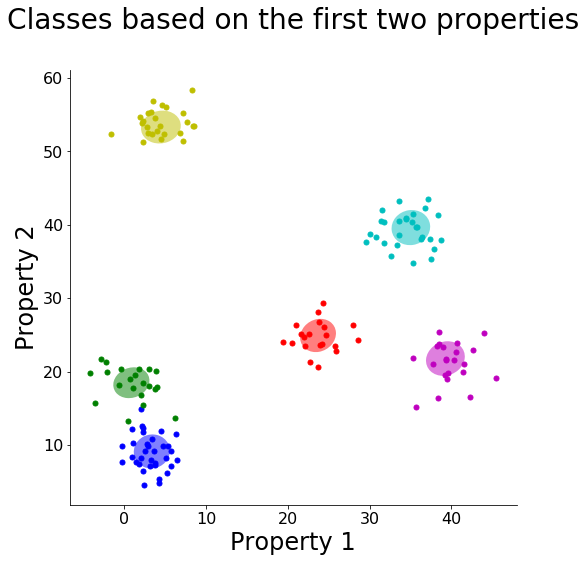

In [7]:
# plot parameters
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'fontname':'Arial', 'size':'24'}
Title_font = {'fontname':'Arial', 'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [Mu[i][0],Mu[i][1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(Cov[i][0:2,0:2])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    thetaO = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=thetaO)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.plot(rAlln[i][:,0],rAlln[i][:,1], '.', c=color[i], markersize=sizeMean)
    ax.add_artist(ellip)
        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Property 2', **axis_font)
ax.set_xlabel('Property 1', **axis_font)
ax.set_title('Classes based on the first two properties', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

In [8]:
# putting the generated data into an array form
y = np.empty([1, NProperties])
for i in range(NClasses):
    y = np.vstack((y,rAlln[i]))
    
y = np.delete(y, 0, axis=0)

# Getting the true classes of the points 
v_true = np.zeros((1)) 
for i,j in enumerate(r):
    v_true = np.hstack((v_true, np.repeat(i+1, j)))

v_true = np.array([v_true[1:]])
y_true = np.concatenate((y, v_true.T), axis=1)

# random shuffle the data points
np.random.shuffle(y_true)

y = y_true[:,0:-1]

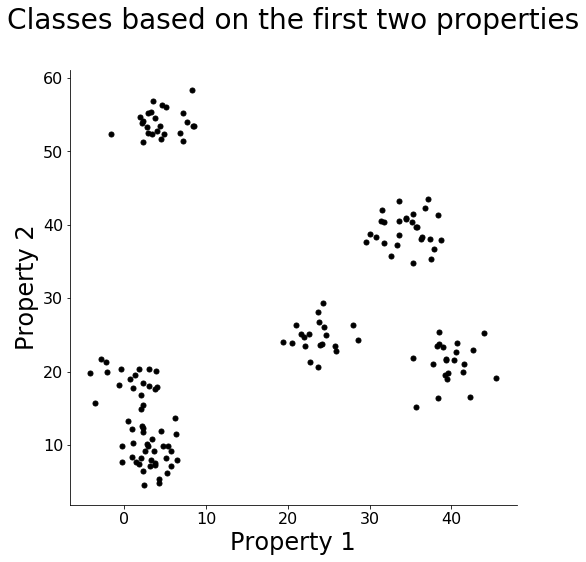

In [9]:
# plot parameters
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'fontname':'Arial', 'size':'24'}
Title_font = {'fontname':'Arial', 'size':'28'}

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Property 2', **axis_font)
ax.set_xlabel('Property 1', **axis_font)
ax.set_title('Classes based on the first two properties', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

In [10]:
# for random classes
v = np.array([random.randint(1, NClasses+1) for i in range(y.shape[0])])

In [11]:
broadness = 2

initMu = np.empty([NClasses, NProperties])
initCov = np.empty([NProperties, NProperties, NClasses])

for j in range(NClasses):
    
    initMu[j,:] = np.random.random(NProperties)*np.amax(y, axis=0)
    initCov[:,:,j] = np.mean(np.array(Cov), axis=0)+broadness
    
initW = theta

In [12]:
def EStep(y, w, mu, cov):
    
    r_ij = np.zeros((y.shape[0], mu.shape[0]))

    for Object in range(y.shape[0]):
        
        r_ij_Sumj = np.zeros(mu.shape[0])
        
        for jClass in range(mu.shape[0]):
            
            r_ij_Sumj[jClass] = w[jClass] * sc.stats.multivariate_normal.pdf(y[Object,:], mu[jClass,:], cov[:,:,jClass])
        
        for jClass in range(r_ij_Sumj.shape[0]):
            r_ij[Object,jClass] =   r_ij_Sumj[jClass] / np.sum(r_ij_Sumj)
    
    return r_ij

In [13]:
def MStep(r, y, mu, cov):
    
    N = y.shape[0]
    
    # the weigths
    w_j = np.sum(r, axis=0) / N
    
    Allmu_j = np.zeros((N, mu.shape[0], mu.shape[1]))
    Allcov_j = np.zeros((N, cov.shape[0], cov.shape[1], cov.shape[2]))
    
    # mean
    for Object in range(N):
        
        Allmu_j[Object,:,:] = np.outer(r[Object,:], y[Object,:])
    
    mu_j = np.zeros((mu.shape[0], mu.shape[1]))
    
    for j in range(cov.shape[2]):
        mu_j[j,:] = (1/np.sum(r, axis=0)[j]) * np.sum(Allmu_j, axis=0)[j,:]
        
    # sd
    for Object in range(N):
        for j in range(cov.shape[2]):
            Allcov_j[Object,:,:,j] = r[Object,j] * np.outer((y[Object,:] - mu_j[j,:]), (y[Object,:]-mu_j[j,:]))

    cov_j = np.zeros((cov.shape[0], cov.shape[1], cov.shape[2]))
    
    for j in range(cov.shape[2]):
        
        cov_j[:,:,j] = (1/np.sum(r, axis=0)[j]) * np.sum(Allcov_j, axis=0)[:,:,j]
    
    return w_j,mu_j,cov_j

In [14]:
r_n = EStep(y, initW, initMu, initCov)
w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
print(w_n)
print(mu_n)
print(cov_n)

[1.15084378e-33 1.66666667e-01 2.03789946e-01 6.54388736e-35
 3.60791183e-01 2.68752204e-01]
[[ 4.42232869 55.26450032 53.37809414 59.86954866]
 [ 4.44048894 53.93426732 55.9832186  58.08874984]
 [32.99729074 37.741931   37.75362788  9.88686909]
 [ 5.53487359 13.81688588 13.39286919 16.95289537]
 [ 9.73936159 18.70822232  9.42136575 12.22293051]
 [22.52337409 14.47369917 20.23674174 14.3180045 ]]
[[[ 2.75024046e+00  5.91578855e+00  5.95389392e+01  5.54615272e+00
    1.18849453e+02  3.31893957e+02]
  [ 5.85732045e-01  7.90349588e-01  3.08326393e+01 -1.14319107e+00
    4.65877301e+01  1.22316034e+02]
  [ 1.03929428e+00  1.51152541e+00  3.26090174e+01 -2.76520475e-01
   -8.64350248e+00  2.75099321e+02]
  [ 1.67852300e+00  1.40687243e+00 -2.81783400e+00  1.60001125e+00
    3.81588733e+01  1.85858114e+02]]

 [[ 5.85732045e-01  7.90349588e-01  3.08326393e+01 -1.14319107e+00
    4.65877301e+01  1.22316034e+02]
  [ 1.35035994e+00  3.13376431e+00  3.17128145e+01  2.35809736e-01
    3.39835638e+

In [17]:
Inititeration = 100
EMiteration = 40
lookLH = 20

for init in range(Inititeration):
    
    # starting values
    initMu = np.empty([NClasses, NProperties])
    for j in range(NClasses):
        initMu[j,:] = np.random.random(NProperties)*np.amax(y, axis=0)
        
    r_n = EStep(y, initW, initMu, initCov)
    w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
    
    if init == 0:
        logLH = -1000000000000
        
    for i in range(EMiteration):

        # E step
        r_n = EStep(y, w_n, mu_n, cov_n)

        # M step
        w_n,mu_n,sigma_n = MStep(r_n, y, mu_n, cov_n)

        # compute log likelihood
        logLall = np.zeros((y.shape[0]))

        for Object in range(y.shape[0]):

            LH = np.zeros(NClasses)

            for jClass in range(NClasses):
                LH[jClass] = w_n[jClass] * sc.stats.multivariate_normal.pdf(y[Object,:], mu_n[jClass,:], cov_n[:,:,jClass])

            logLall[Object] = np.log(np.sum(LH))
        
        logL = np.sum(logLall)

        if i > EMiteration - lookLH:
            print(logL)

    if logL > logLH:
        logLH = logL
        print('found larger: ', logLH)
        w_p = w_n
        mu_p = mu_n
        sigma_p = sigma_n
        r_p = r_n

-1780.3534257138508
-1780.3534257138508
-1780.3534257138506
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138506
-1780.3534257138508
-1780.3534257138506
-1780.3534257138506
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
-1780.3534257138508
found larger:  -1780.3534257138508
-1704.9754168832312
-1704.9754168823372
-1704.975416882066
-1704.975416881984
-1704.975416881959
-1704.9754168819516
-1704.9754168819493
-1704.9754168819486
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
-1704.9754168819481
found larger:  -1704.9754168819481
-1859.7177083525232
-1859.7177083525232
-1859.717708352523
-1859.717708352523
-1859.717708352523
-1859.717708352523
-1859.717708352523
-1859.717708352523
-1859.717708352523


LinAlgError: singular matrix

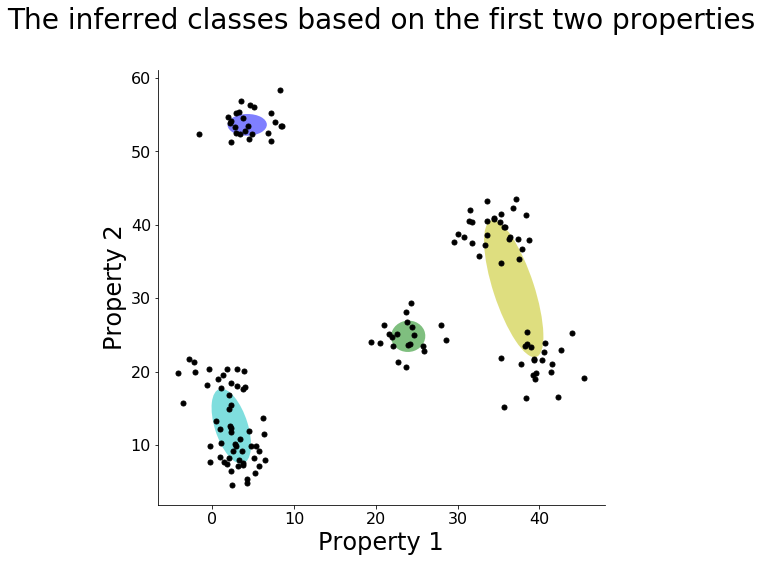

In [18]:
# plot parameters
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'fontname':'Arial', 'size':'24'}
Title_font = {'fontname':'Arial', 'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [mu_p[i,0],mu_p[i,1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(sigma_p[0:2,0:2,i])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    thetaO = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=thetaO)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.add_artist(ellip)
       
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Property 2', **axis_font)
ax.set_xlabel('Property 1', **axis_font)
ax.set_title('The inferred classes based on the first two properties', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()